In [1]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
import torch
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageEnhance,ImageOps

In [2]:
import warnings
from contextlib import contextmanager
from transformers import MBartTokenizer, ViTImageProcessor,XLMRobertaTokenizer
from transformers import ProcessorMixin
from transformers import TrOCRProcessor

class CustomOCRProcessor(ProcessorMixin):
    attributes = ["image_processor", "tokenizer"]
    image_processor_class = "AutoImageProcessor"
    tokenizer_class = "AutoTokenizer"

    def __init__(self, image_processor=None, tokenizer=None, **kwargs):
        if "feature_extractor" in kwargs:
            warnings.warn(
                "The `feature_extractor` argument is deprecated and will be removed in v5, use `image_processor`"
                " instead.",
                FutureWarning,
            )
            feature_extractor = kwargs.pop("feature_extractor")

        image_processor = image_processor if image_processor is not None else feature_extractor
        if image_processor is None:
            raise ValueError("You need to specify an `image_processor`.")
        if tokenizer is None:
            raise ValueError("You need to specify a `tokenizer`.")

        super().__init__(image_processor, tokenizer)
        self.current_processor = self.image_processor
        self._in_target_context_manager = False

    def __call__(self, *args, **kwargs):
        # For backward compatibility
        if self._in_target_context_manager:
            return self.current_processor(*args, **kwargs)

        images = kwargs.pop("images", None)
        text = kwargs.pop("text", None)
        if len(args) > 0:
            images = args[0]
            args = args[1:]

        if images is None and text is None:
            raise ValueError("You need to specify either an `images` or `text` input to process.")

        if images is not None:
            inputs = self.image_processor(images, *args, **kwargs)
        if text is not None:
            encodings = self.tokenizer(text, **kwargs)

        if text is None:
            return inputs
        elif images is None:
            return encodings
        else:
            inputs["labels"] = encodings["input_ids"]
            return inputs

    def batch_decode(self, *args, **kwargs):
        return self.tokenizer.batch_decode(*args, **kwargs)

    def decode(self, *args, **kwargs):
        return self.tokenizer.decode(*args, **kwargs)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
processor1 = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 
image_processor = ViTImageProcessor.from_pretrained(
    'microsoft/swin-base-patch4-window12-384-in22k'
)
tokenizer = MBartTokenizer.from_pretrained(
    'facebook/mbart-large-50'
)
processor = CustomOCRProcessor(image_processor,tokenizer)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
modelIAMs= VisionEncoderDecoderModel.from_pretrained(r"musadac/vilanocr-single-urdu").to(device)

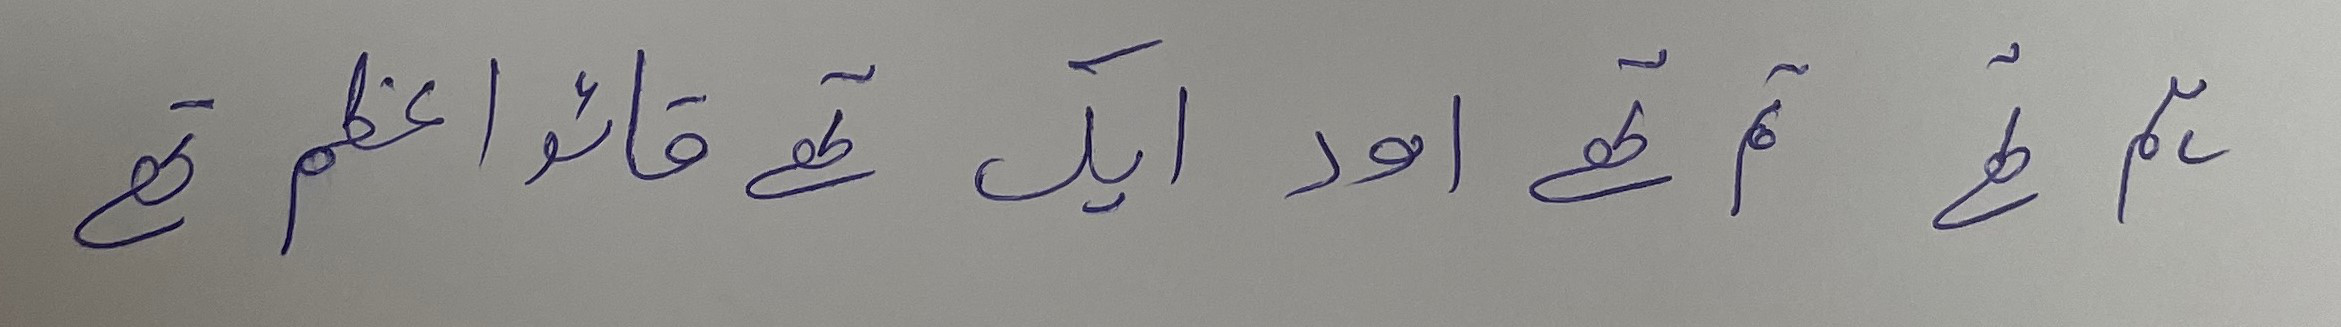

ہم تھے تمھے اور ایک تھے قائد اعظم تھے


In [24]:

image = Image.open(r'./TestImages/Zeeshan.jpg')
display(image)
pixel_values = processor(image.convert("RGB"), return_tensors="pt").pixel_values
generated_ids = modelIAMs.generate(pixel_values.to(device))
IAMst = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(IAMst)

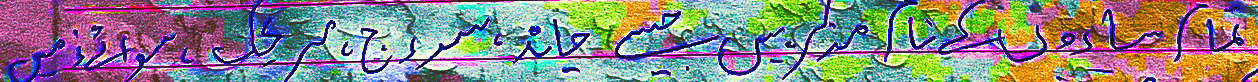

تمام معاہدوں کے نام مدنظر ہیں جیسے چاند، سورج، چمک، سرد خانے میں


In [104]:
ids =[]
text = []
import os
# for i in os.listdir('./urdulines'):
image = Image.open("./TestImages/UrduTest6.png").convert("L")


Enhance saturation
saturation_factor = 11.5
enhancer_saturation = ImageEnhance.Color(enhanced_image)
enhanced_image = enhancer_saturation.enhance(saturation_factor)

Enhance contrast
contrast_factor = 1
enhancer_contrast = ImageEnhance.Contrast(enhanced_image)
enhanced_image = enhancer_contrast.enhance(contrast_factor)

Enhance sharpness
sharpness_factor = 1
enhancer_sharpness = ImageEnhance.Sharpness(enhanced_image)
enhanced_image = enhancer_sharpness.enhance(sharpness_factor)

    # Equalize the histogram
enhanced_image = ImageOps.equalize(enhanced_image)
display(enhanced_image)

pixel_values = processor(image.convert("RGB"), return_tensors="pt").pixel_values
generated_ids = modelIAMs.generate(pixel_values.to(device))
IAMst = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(IAMst)
text.append(IAMst)
ids.append(i)